In [42]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

In [43]:
df = yf.download('BTC-USD')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2024-06-19,65146.660156,65695.351562,64693.300781,64960.296875,64960.296875,21103423504
2024-06-20,64960.296875,66438.960938,64547.847656,64828.656250,64828.656250,25641109124
2024-06-21,64837.988281,65007.546875,63378.894531,64096.199219,64096.199219,26188171739


In [44]:
df.shape

(3568, 6)

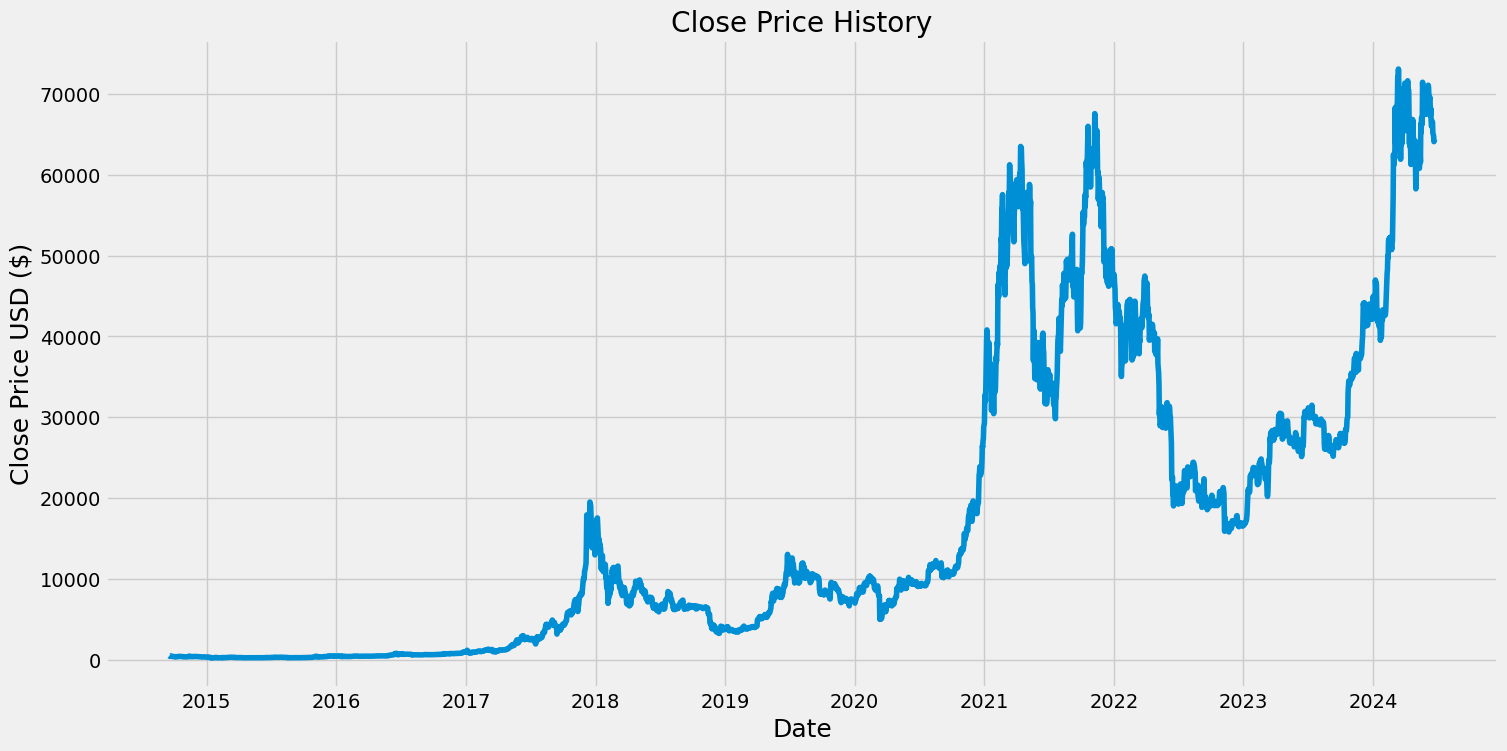

In [45]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [46]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

2855

In [47]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00383005],
       [0.00337886],
       [0.00297225],
       ...,
       [0.87672654],
       [0.87887149],
       [0.88067638]])

In [48]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []


for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.00383005, 0.00337886, 0.00297225, 0.00316576, 0.00302746,
       0.00307315, 0.00353455, 0.00336192, 0.00320238, 0.00310432,
       0.00303705, 0.00273063, 0.00270712, 0.00286455, 0.00281889,
       0.00270171, 0.00248828, 0.00206793, 0.00195331, 0.00208456,
       0.00216834, 0.00239814, 0.00256391, 0.0025164 , 0.00252651,
       0.0027494 , 0.00291214, 0.00305556, 0.00297193, 0.00280436,
       0.00282085, 0.00292624, 0.00290024, 0.00280832, 0.00285812,
       0.00281262, 0.00247326, 0.00247227, 0.00232038, 0.00242233,
       0.00239881, 0.0024623 , 0.00216017, 0.00229341, 0.00219762,
       0.00202517, 0.00202713, 0.00204993, 0.00209023, 0.00221359,
       0.00234807, 0.00225377, 0.00229592, 0.00253974, 0.00258995,
       0.00260052, 0.0033668 , 0.00332804, 0.0030137 , 0.00271626])]
[0.0028774137488077373]



In [49]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [50]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2795, 60, 1)

In [51]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/Users/oattao/Desktop/learn_trad/learntrad/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [52]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [53]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

2795/2795 ━━━━━━━━━━━━━━━━━━━━ 47s 16ms/step - loss: 0.0020


In [54]:
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :] 
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [55]:
x_test = np.array(x_test)

In [56]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [57]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [58]:
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

170.5624287780505

/var/folders/5f/1zf902pj3r74d6cxx3w0j0gw0000gn/T/ipykernel_16177/4019845326.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


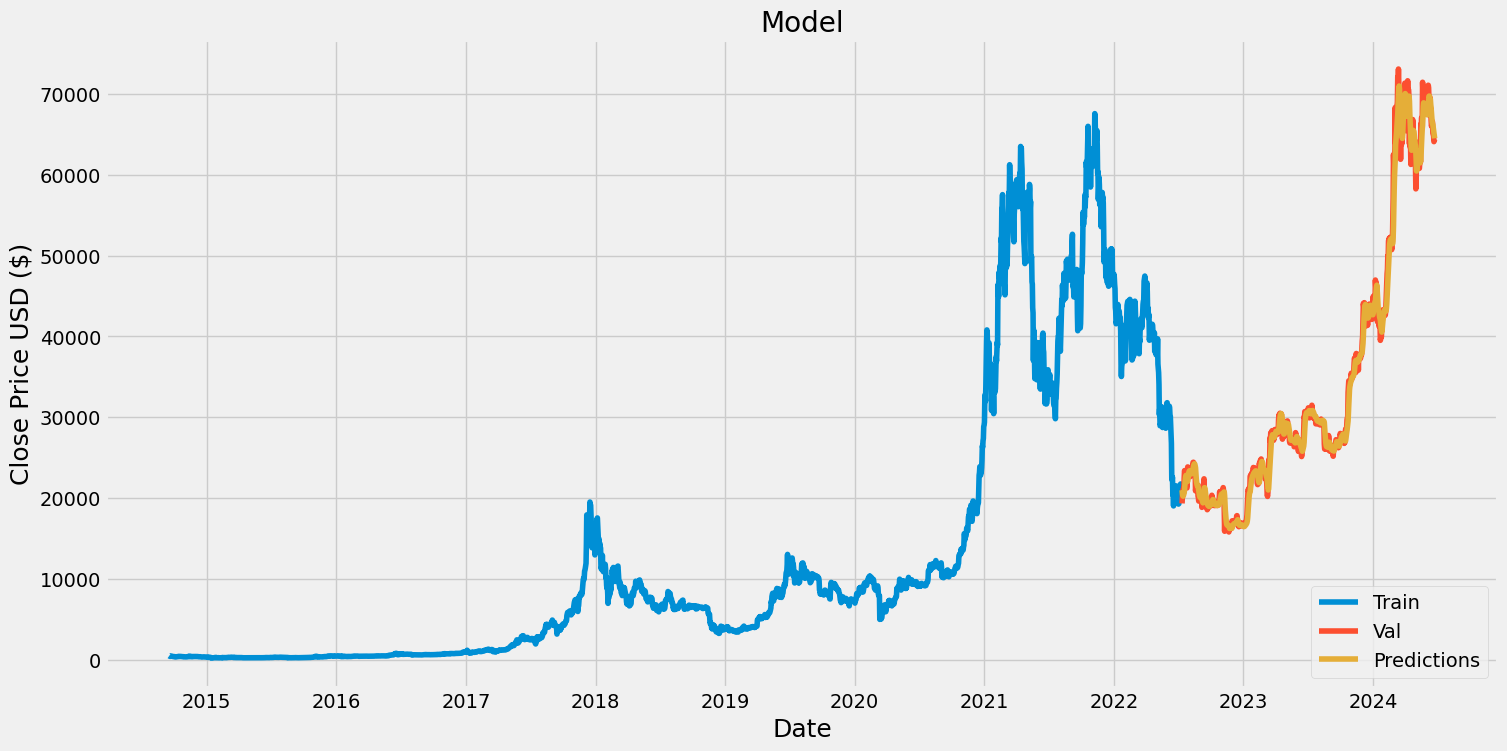

In [59]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [60]:
btc_quote = yf.download('BTC-USD')
new_df = btc_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%%**********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[64358.367]]


In [61]:
btc_quote2 = yf.download('BTC-USD')
print(btc_quote2['Close'])

[*********************100%%**********************]  1 of 1 completed

Date
2014-09-17      457.334015
2014-09-18      424.440002
2014-09-19      394.795990
2014-09-20      408.903992
2014-09-21      398.821014
                  ...     
2024-06-19    64960.296875
2024-06-20    64828.656250
2024-06-21    64096.199219
2024-06-22    64252.578125
2024-06-23    64387.261719
Name: Close, Length: 3568, dtype: float64
